In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [ ]:
! kaggle datasets download arjunbhasin2013/ccdata

  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 120MB/s]


In [ ]:
! unzip /content/ccdata.zip

Archive:  /content/ccdata.zip
  inflating: CC GENERAL.csv          


In [ ]:
df = pd.read_csv('CC GENERAL.csv')
df.head()
df.shape

(8950, 18)

In [ ]:
df_count = pd.DataFrame()
df_count['cust_id'] = df['CUST_ID'].unique()
df_count

,cust_id
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005
...,...
8945,C19186
8946,C19187
8947,C19188
8948,C19189


In [ ]:
columns = ['BALANCE_FREQUENCY','ONEOFF_PURCHASES','ONEOFF_PURCHASES_FREQUENCY',
           'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']
df_old = df.copy()

In [ ]:
df = df.drop(columns, axis = 1)

In [ ]:
df.dropna(inplace=True)
df.head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C10001,40.900749,95.40,95.40,0.000000,0.166667,0,2,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,0.00,6442.945483,0.000000,4,0,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,0.00,0.000000,1.000000,0,12,7500.0,622.066742,627.284787,12
4,C10005,817.714335,16.00,0.00,0.000000,0.083333,0,1,1200.0,678.334763,244.791237,12
5,C10006,1809.828751,1333.28,1333.28,0.000000,0.666667,0,8,1800.0,1400.057770,2407.246035,12


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:,1:]
clus_dataset = scaler.fit_transform(X)
clus_dataset

array([[-0.74462486, -0.42918384, -0.35482593, ..., -0.54394191,
        -0.30550763,  0.35518066],
       [ 0.76415211, -0.47320819, -0.45883904, ...,  0.79685226,
         0.08768873,  0.35518066],
       [ 0.42660239, -0.11641251, -0.45883904, ..., -0.39950328,
        -0.09990611,  0.35518066],
       ...,
       [-0.75297728, -0.40657175, -0.30140201, ..., -0.5853667 ,
        -0.32957217, -4.22180042],
       [-0.75772142, -0.47320819, -0.45883904, ..., -0.59523762,
        -0.34081076, -4.22180042],
       [-0.58627829,  0.03129519, -0.45883904, ..., -0.59158925,
        -0.32709767, -4.22180042]])

In [ ]:
clus_dataset.shape

(8636, 11)

In [ ]:
clustering = AgglomerativeClustering(n_clusters=4)
clustering.fit(clus_dataset)
# labels_ attribute stores the cluster labels of each point
labels = clustering.labels_
print(labels)

[0 2 0 ... 3 3 3]


In [ ]:
df['clus_labels'] = labels
df.head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,clus_labels
0,C10001,40.900749,95.40,95.40,0.000000,0.166667,0,2,1000.0,201.802084,139.509787,12,0
1,C10002,3202.467416,0.00,0.00,6442.945483,0.000000,4,0,7000.0,4103.032597,1072.340217,12,2
2,C10003,2495.148862,773.17,0.00,0.000000,1.000000,0,12,7500.0,622.066742,627.284787,12,0
4,C10005,817.714335,16.00,0.00,0.000000,0.083333,0,1,1200.0,678.334763,244.791237,12,0
5,C10006,1809.828751,1333.28,1333.28,0.000000,0.666667,0,8,1800.0,1400.057770,2407.246035,12,0


In [ ]:
df_vals = df.values[:,1:]
df_vals

array([[40.900749, 95.4, 95.4, ..., 139.509787, 12, 0],
       [3202.467416, 0.0, 0.0, ..., 1072.340217, 12, 2],
       [2495.148862, 773.17, 0.0, ..., 627.284787, 12, 0],
       ...,
       [23.398673, 144.4, 144.4, ..., 82.418369, 6, 3],
       [13.457564, 0.0, 0.0, ..., 55.755628, 6, 3],
       [372.708075, 1093.25, 0.0, ..., 88.288956, 6, 3]], dtype=object)

In [ ]:
data_arr = scaler.fit_transform(df.values[:,1:])

In [ ]:
data_arr

array([[-0.74462486, -0.42918384, -0.35482593, ..., -0.30550763,
         0.35518066, -0.58121057],
       [ 0.76415211, -0.47320819, -0.45883904, ...,  0.08768873,
         0.35518066,  1.40782627],
       [ 0.42660239, -0.11641251, -0.45883904, ..., -0.09990611,
         0.35518066, -0.58121057],
       ...,
       [-0.75297728, -0.40657175, -0.30140201, ..., -0.32957217,
        -4.22180042,  2.40234468],
       [-0.75772142, -0.47320819, -0.45883904, ..., -0.34081076,
        -4.22180042,  2.40234468],
       [-0.58627829,  0.03129519, -0.45883904, ..., -0.32709767,
        -4.22180042,  2.40234468]])

In [ ]:
area = np.pi * (data_arr[:,3]) ** 2
# why these values for area

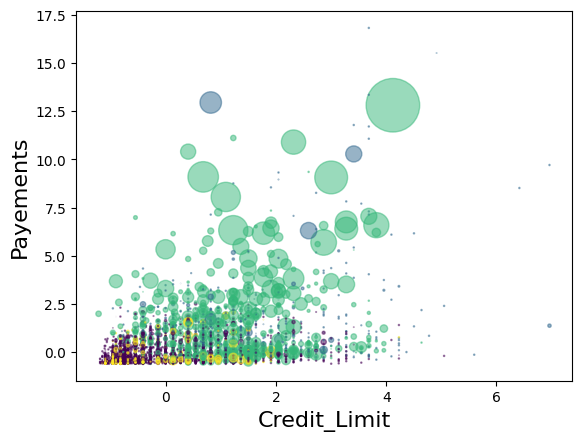

In [ ]:
plt.scatter(data_arr[:,-5], data_arr[:,-4], s=area, c=labels.astype(float), alpha = 0.5)
plt.xlabel('Credit_Limit', fontsize=16)
plt.ylabel('Payements', fontsize=16)
plt.show()